In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

df = pd.read_csv("apartments_for_rent_classified_10k.csv", sep=";", encoding='cp1252')

In [4]:
df.shape

(10000, 22)

In [5]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [6]:
display(df)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [7]:
# remove rows where rent is not payed monthly, where there are no bedrooms, and where the listing is not categorized as "housing/rent/apartment"
filtered_df = df[df['price_type'] == 'Monthly']
filtered_df = filtered_df[filtered_df['bedrooms'] != 0]
filtered_df = filtered_df[filtered_df['category'] == 'housing/rent/apartment']

In [8]:
display(filtered_df)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
12,5664598162,housing/rent/apartment,Studio apartment 2326 N 6th Avenue,"This unit is located at 2326 N sixth Avenue, T...",NaN,NaN,1.0,USD,No,Thumbnail,...,"$1,795",Monthly,156,2326 N 6th Ave,Tucson,AZ,32.2264,-110.9438,RentLingo,1577017148
16,5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,"$1,560",Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
17,5664574876,housing/rent/apartment,One BR Spring Ridge Dr,"This unit is located at Spring Ridge Dr, Sprin...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$1,000",Monthly,200,NaN,Spring,TX,30.0871,-95.4685,RentLingo,1577015327
18,5668633573,housing/rent/apartment,Studio apartment 545 Georgia street 717-723 Su...,This unit is located at 545 Georgia street 717...,NaN,1.0,1.0,USD,No,Thumbnail,...,$950,Monthly,200,545 Georgia St 717-723 Sutter St,Vallejo,CA,38.1172,-122.2313,RentLingo,1577359918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [9]:
# remove columns except for number of bathrooms, number of bedrooms, price, square feet, latitude, and longitude

apartment_df = filtered_df[['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']]

In [10]:
display(apartment_df)

,bathrooms,bedrooms,price,square_feet,latitude,longitude
1,NaN,1.0,425,106,37.9680,-87.6621
12,NaN,1.0,1795,156,32.2264,-110.9438
16,1.0,1.0,1560,200,35.0960,-77.0272
17,1.0,1.0,1000,200,30.0871,-95.4685
18,1.0,1.0,950,200,38.1172,-122.2313
...,...,...,...,...,...,...
9995,4.0,5.0,6000,6300,44.9000,-93.3233
9996,8.0,6.0,25000,8716,34.4331,-119.6331
9997,8.5,6.0,11000,11318,39.0287,-77.2409
9998,NaN,1.0,4790,40000,40.7716,-73.9876


In [11]:
# remove rows where there is NaN

apartment_df = apartment_df.dropna()

display(apartment_df)

,bathrooms,bedrooms,price,square_feet,latitude,longitude
16,1.0,1.0,1560,200,35.0960,-77.0272
17,1.0,1.0,1000,200,30.0871,-95.4685
18,1.0,1.0,950,200,38.1172,-122.2313
19,1.0,1.0,625,200,33.9649,-84.5107
20,1.0,1.0,600,200,35.2016,-80.8124
...,...,...,...,...,...,...
9994,4.0,6.0,3000,5921,37.0835,-113.5823
9995,4.0,5.0,6000,6300,44.9000,-93.3233
9996,8.0,6.0,25000,8716,34.4331,-119.6331
9997,8.5,6.0,11000,11318,39.0287,-77.2409


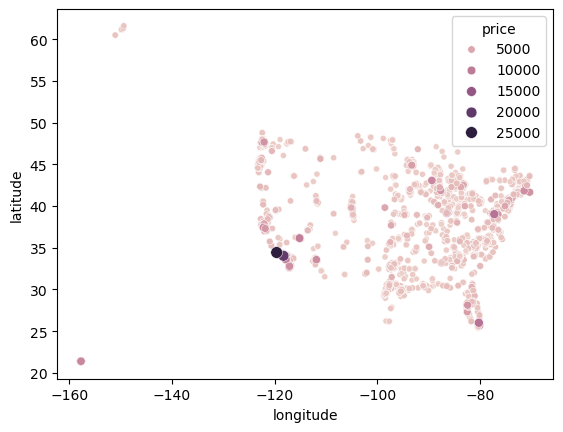

In [12]:

sns.scatterplot(data=apartment_df, x='longitude', y='latitude', hue='price', size='price')

plt.legend(title="price")
plt.show()

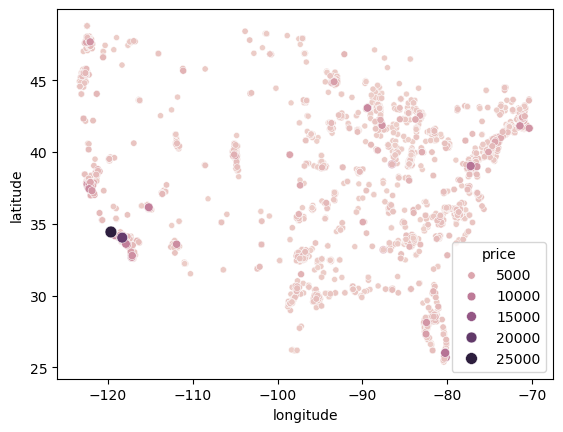

In [13]:
# remove non-mainland US entries

apartment_df = apartment_df[apartment_df['longitude'] >= -140]

sns.scatterplot(data=apartment_df, x='longitude', y='latitude', hue='price', size='price')

plt.legend(title="price")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

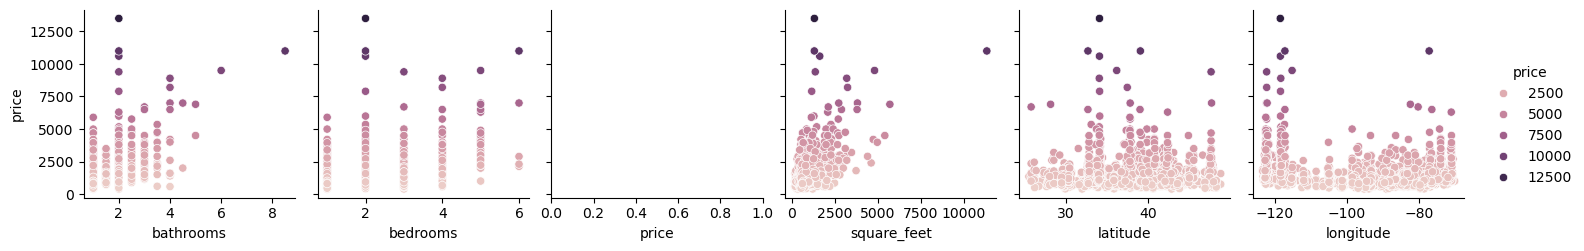

In [14]:
rng = np.random.RandomState()
indices = rng.choice(np.arange(len(apartment_df)), size=2500, replace=False)

sns.pairplot(apartment_df.iloc[indices], x_vars=apartment_df.columns, y_vars='price', hue='price')
plt.show

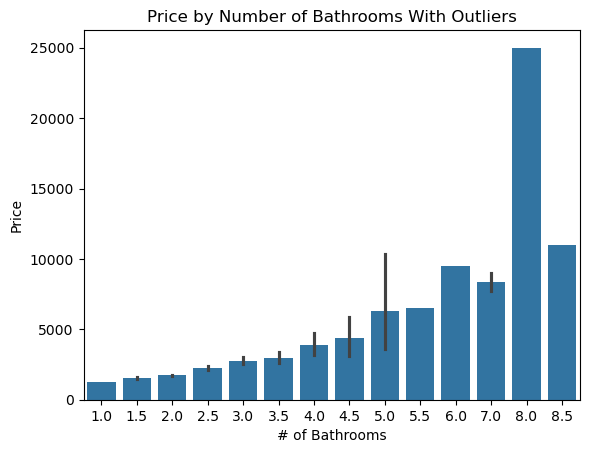

In [15]:
sns.barplot(x='bathrooms', y='price', data=apartment_df)

plt.title('Price by Number of Bathrooms With Outliers')
plt.xlabel('# of Bathrooms')
plt.ylabel('Price')
plt.show()

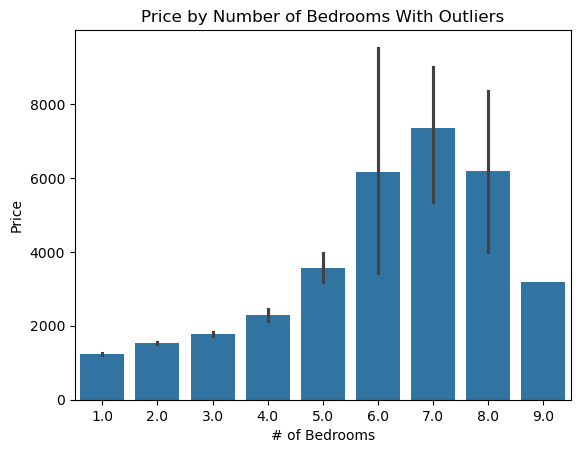

In [16]:
sns.barplot(x='bedrooms', y='price', data=apartment_df)

plt.title('Price by Number of Bedrooms With Outliers')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')
plt.show()

In [17]:
# remove outliers outside of the IQR

# got help from chatgpt for removing outliers
Q1 = apartment_df['price'].quantile(0.25) 
Q3 = apartment_df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

apt_df = apartment_df[(apartment_df['price'] >= lower_bound) & (apartment_df['price'] <= upper_bound)]

print("Original DataFrame:")
print(apartment_df)

print("\nFiltered DataFrame:")
print(apt_df)


Original DataFrame:
      bathrooms  bedrooms  price  square_feet  latitude  longitude
16          1.0       1.0   1560          200   35.0960   -77.0272
17          1.0       1.0   1000          200   30.0871   -95.4685
18          1.0       1.0    950          200   38.1172  -122.2313
19          1.0       1.0    625          200   33.9649   -84.5107
20          1.0       1.0    600          200   35.2016   -80.8124
...         ...       ...    ...          ...       ...        ...
9994        4.0       6.0   3000         5921   37.0835  -113.5823
9995        4.0       5.0   6000         6300   44.9000   -93.3233
9996        8.0       6.0  25000         8716   34.4331  -119.6331
9997        8.5       6.0  11000        11318   39.0287   -77.2409
9999        1.0       1.0   1009          880   34.0072   -84.0034

[9706 rows x 6 columns]

Filtered DataFrame:
      bathrooms  bedrooms  price  square_feet  latitude  longitude
16          1.0       1.0   1560          200   35.0960   -77.0

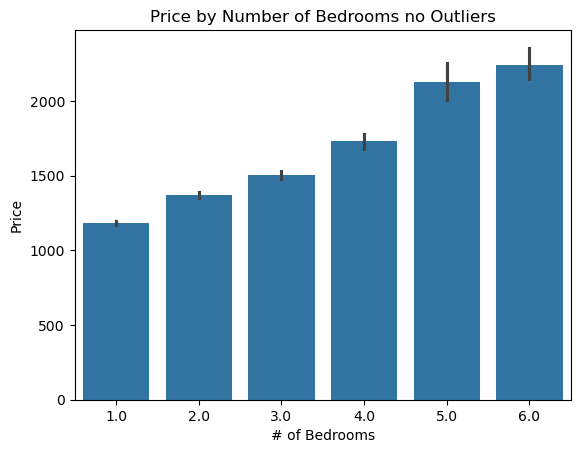

In [18]:
sns.barplot(x='bedrooms', y='price', data=apt_df)

plt.title('Price by Number of Bedrooms no Outliers')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')
plt.show()

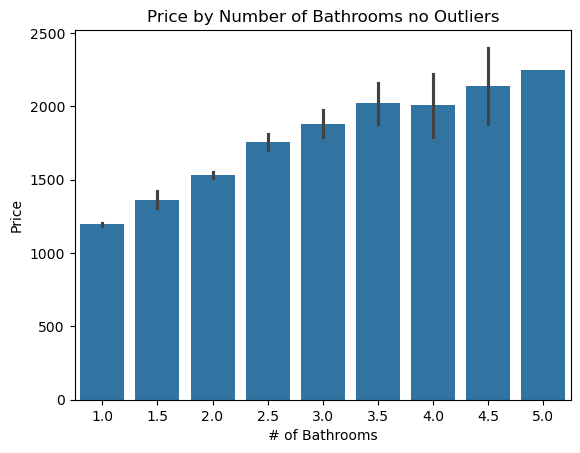

In [19]:
sns.barplot(x='bathrooms', y='price', data=apt_df)

plt.title('Price by Number of Bathrooms no Outliers')
plt.xlabel('# of Bathrooms')
plt.ylabel('Price')
plt.show()

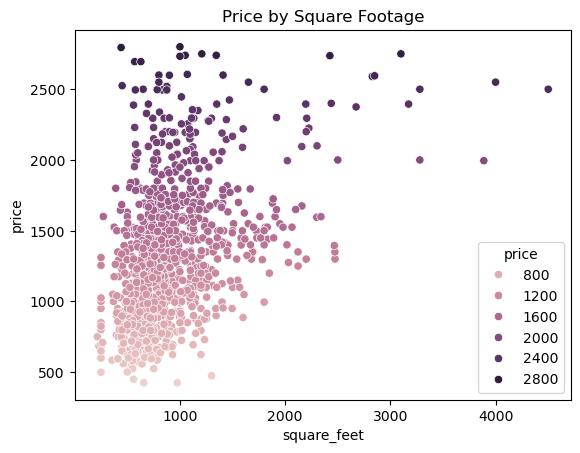

In [20]:
indices = rng.choice(np.arange(len(apt_df)), size=1000, replace=False)

sns.scatterplot(data=apt_df.iloc[indices], x='square_feet', y='price', hue='price')
plt.title('Price by Square Footage')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from typing import List, Dict, Tuple, Callable

In [22]:
# Ordinary Least Squares

def get_train_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    
    return X_trn, y_trn, X_tst, y_tst

def add_bias(X: np.ndarray) -> np.ndarray:
    m_samples = len(X)
    bias = np.ones([m_samples, 1])
    
    X1 = np.hstack([bias, X])
    return X1

def get_preprocessed_data():
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(X=apt_df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']].values, y=apt_df[['price']].values)
    
    X_trn = add_bias(X_trn)
    X_tst = add_bias(X_tst)
    
    return X_trn, y_trn, X_tst, y_tst

def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the sum of squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the SSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    
    return np.sum((y_hat - y) ** 2)


def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the mean square error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the MSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    
    return np.mean((y - y_hat) ** 2)


def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the root means squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the RMSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    
    return np.sqrt(np.mean((y - y_hat) ** 2))

class OrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:
            w: The weights learned by using the normal equation

    """
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference. 
        """
        self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        
        return X @ self.w

In [23]:
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
ols = OrdinaryLeastSquares()
ols.fit(X_trn, y_trn)
y_tst_hat = ols.predict(X_tst)

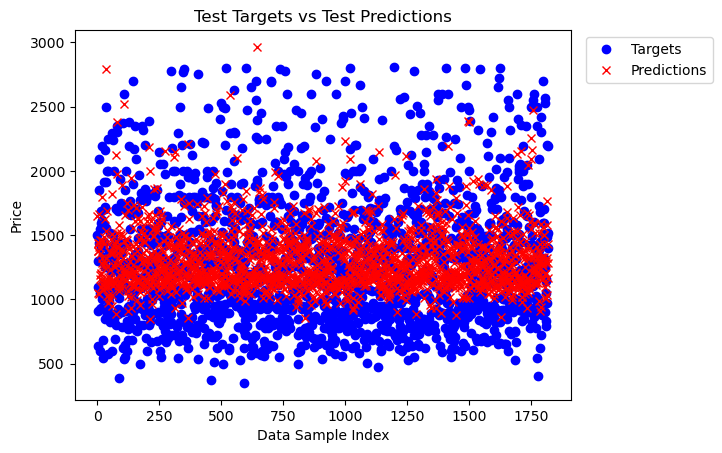

In [24]:
plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_tst_hat, 'xr', label='Predictions')
plt.xlabel("Data Sample Index")
plt.ylabel("Price")
plt.title("Test Targets vs Test Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()


In [25]:
tst_sse = sse(y_tst, y_tst_hat)
tst_mse = mse(y_tst, y_tst_hat)
tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE: {tst_rmse}")

Test SSE: 376640053.92531955
Test MSE: 206831.44092549125
Test RMSE: 454.787247980296


In [26]:
# Least Mean Squares

class Standardize():
    """ Standize data based on mean and STD computed using training data

        Attributes:
            mean: Vector of means for each feature 

            std: Vector of STDs for each feature
            
    """
    def __init__(self):
        self.mean: np.ndarray = None
        self.std: np.ndarray = None
    
    def fit(self, X: np.ndarray) -> object:
        """ Computes the mean and std using the training data.

            Args:
                X: training data given as a matrix

            Return:
                Reference to object's instance
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
        return self
        
    def transform(self, X: np.ndarray) -> np.ndarray:
        """ Transforms the passed data using standardization based on the 
            precomputed mean and STD.

            Args:
                X: Data given as a matrix

            Returns:
                Standardized matrix of data
        """
        
        return ((X - self.mean) / self.std)


def get_preprocessed_data():
    """ Gets preprocessed data for training and testing

        Returns:
            A tuple of NumPy arrays where the first two indices 
            contain the training data and targets and the last two
            indicies contain the testing data and targets. Targets
            should be 2D column vectors.
    """
    from sklearn.model_selection import train_test_split
    X_trn, X_tst, y_trn, y_tst = train_test_split(apt_df[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']].values, apt_df[['price']].values, train_size=0.80, test_size=0.20, random_state=42)
    
    s = Standardize()
    s.fit(X_trn)
    X_trn = s.transform(X_trn)
    X_tst = s.transform(X_tst)

    m_samples = len(X_trn)
    bias = np.ones([m_samples, 1])
    X_trn = np.hstack([bias, X_trn])

    m_samples = len(X_tst)
    bias = np.ones([m_samples, 1])
    X_tst = np.hstack([bias, X_tst])

    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)


def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indices
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    
    np.random.shuffle(indices)

    batches = []
    for i in range(0, data_len, batch_size):
        batches.append(indices[i:i + batch_size]) 
    
    return batches


class LeastMeanSquares():
    """ Performs regression using least mean squares (gradient descent)
    
        Attributes:

            alpha: learning rate or step size
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            w: 2D column vector of weights 

            trn_error: Stores the training error for each epoch.
    """

    def __init__(
        self, 
        alpha: float ,
        batch_size: int,
        seed: int = 0,
        epochs: int = 1,
    ):
        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        self.w: np.ndarray = None
        self.trn_error: list = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train LMS to learn weights

            Args:
                X: Training data given as a matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training error
        self.trn_error = []

        self.w = np.random.rand(X.shape[1], 1)
        
        # Loop over training epochs
        for e in range(self.epochs):
            batches = []
            batches = get_batches(len(X), self.batch_size)
            
            # Loop over batched data indices
            for i in batches:
                mean_grad = (X[i].T @ ((X[i] @ self.w) - y[i])) / len(i)
                
                self.w -= self.alpha * mean_grad

            # Compute training error for current epoch
            preds = self.predict(X)
            trn_error = rmse(y, preds)
            self.trn_error.append(trn_error)
            
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Data given as a matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        predictions = X @ self.w
        return predictions





Test SSE: 376287102.8463199
Test MSE: 206637.61825717732
Test RMSE: 454.5741064525974


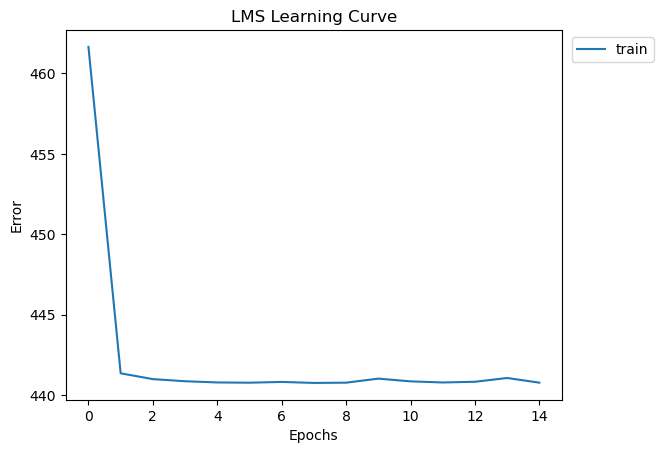

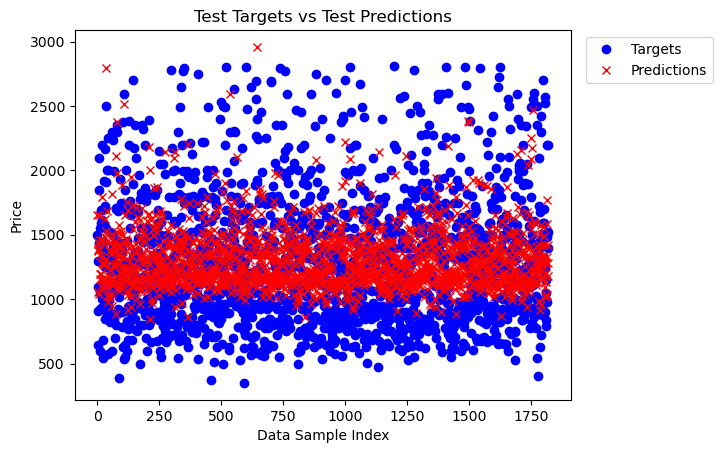

In [27]:
from sklearn.metrics import mean_squared_error

X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()

lms = LeastMeanSquares(alpha=.01, batch_size=32, epochs=15, seed=42)

lms.fit(X_trn, y_trn)

y_tst_hat = lms.predict(X_tst)

tst_sse = sse(y_tst, y_tst_hat)
tst_mse = mse(y_tst, y_tst_hat)
tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE: {tst_rmse}")

### Plotting Code ###
plt.plot(lms.trn_error, label='train')
plt.title("LMS Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend(bbox_to_anchor=(1.2, 1.00))
plt.show()

plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_tst_hat, 'xr', label='Predictions')
plt.xlabel("Data Sample Index")
plt.ylabel("Price")
plt.title("Test Targets vs Test Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()